#  WEB SCRAPPING THROUGH BEAUTIFULSOUP

#### PYTHON PROJECT

#### AMIT SANGER | PYTHON | MAY 20, 2019

        Web scrapping is a great method to get data for various data science projects or other uses. In this project I tried to get data which is name and addresses of restaurants in U.S. which are famous and attached with a famous chef who is either host of any show or winner of any cookery show. In my opinion this a valuable data as if someone wants to make a business model or an app regarding providing services for the famous restaurants in the area. I chose this website from 'Internet Archive', as "Internet Archive is a non-profit library of millions of free books, movies, software, music, websites, and more".
	We can’t fetch more data as it could breach the limit, so I just fetch first 25 results from the page.


### Import some useful libraries

In [1]:
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import ssl

    By 'urlib' we can treat a web page just like a file. urlib handles all HTTP protocols by itself.

### Ignore ssl certificate error

In [2]:
ctx = ssl.create_default_context()
ctx.hostname_checks_common_name = False
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

        The ssl library allows this program to access web sites that strictly enforce HTTPS. 
    Here I provide the permission to the script to go and fetch the data throgh HTTP restrictions.  

Our site is http://www.foodnetwork.com/local/destinations/index.html
If it is forbidden: https://web.archive.org/web/20131011130706/http://www.foodnetwork.com/local/destinations/index.html#/38.736171/-97.222306/4/

In [5]:
url = 'https://web.archive.org/web/20131011130706/http://www.foodnetwork.com/local/destinations/index.html#/38.736171/-97.222306/4/'

    Our url is longer than the url of original site, because I take it from 'Internet Archieve'.

In [6]:
html = urllib.request.urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, 'html.parser')

    urllib.request.urlopen open the url as a file and . read() read all the valuable data.

## Retrieve all the list tags.

    As in the screenshot it is I explained that in developer tool we get to know all the data we need is in the list tags so first all the data from list tag and see what we get.

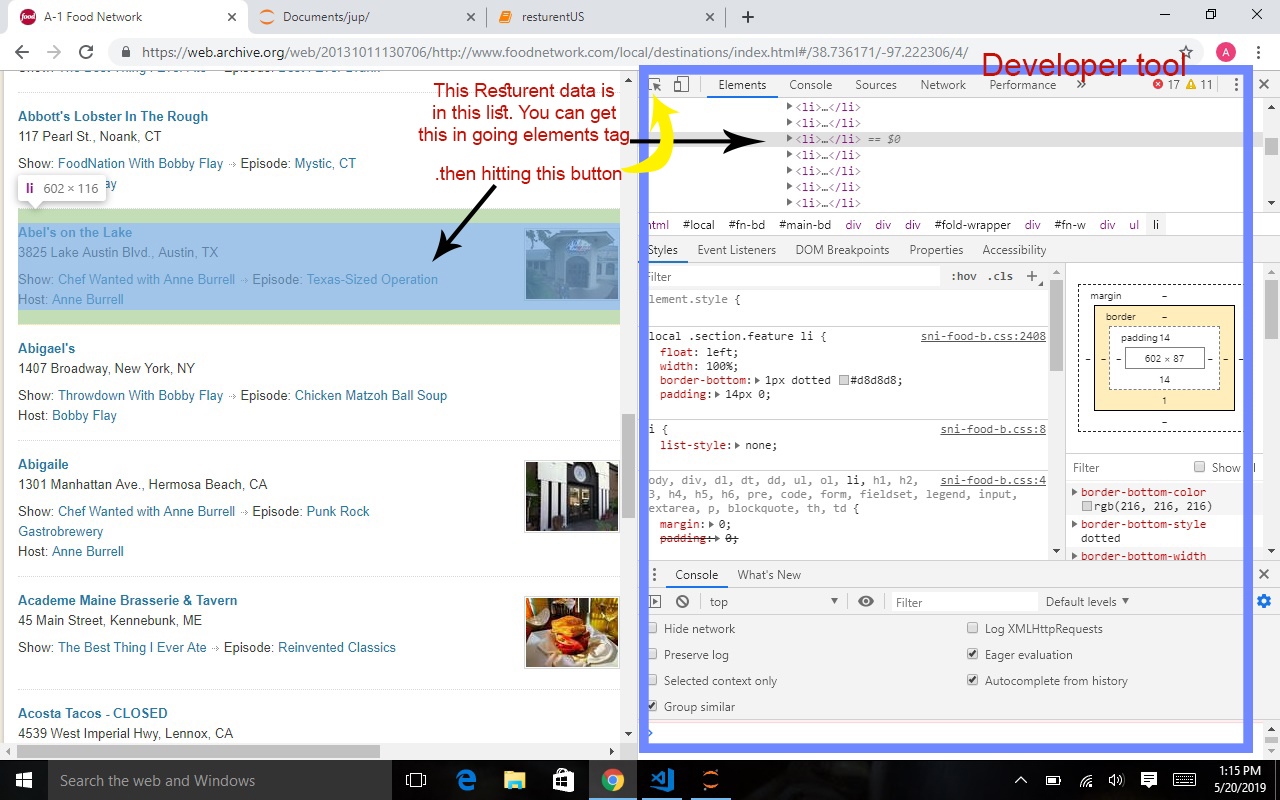

In [51]:
lst = soup('li') #getting data in lst

        In the list data we can see only the red lines carry Resturent's name "A Saigon Cafe" which in 'h3' tag and next to it 'p' tag carry resturent's address. So we need to fech only this data from the list data.
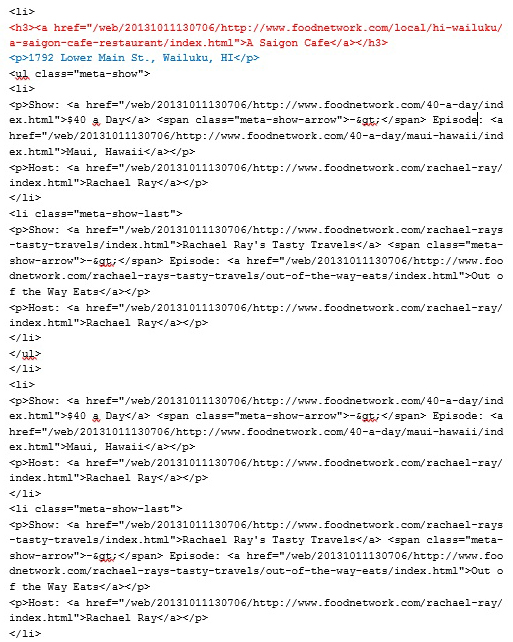

In [102]:
for ls in lst:
    h3 = ls.find('h3') # finding all data from h3 tag
    if h3 != None:
        a = h3.find('a')
        if a != None: # there are many place where ls have 'h3' data but no 'a' data, 
                      # so here's restriction to get only those which doesn't have none value.
            print('\nRestaurant Name:', a.get_text()) # Resturents name we fetch here.
            p = ls.find('p') #getting 'p' data as resturent address saved in it.
            if p != None: #same as 'h3'.
                pn = p.find('a') # while getting data there is apossibilty that we can get
                                #other ptag values which aren't containing address value means
                                #have links So here's restriction for any other p-tag.
                if pn == None:
                    print('Add: ', p.get_text()) #Resturents address we get here.
                else:
                    print('No address available')


Restaurant Name: A Cupcake Wonderland
Add:  Online Only, Philadelphia, PA

Restaurant Name: A Grande Finale - CLOSED
No address available

Restaurant Name: A. Larocca Seafood
Add:  45 Pier #2, San Francisco, CA

Restaurant Name: A Saigon Cafe
Add:  1792 Lower Main St., Wailuku, HI

Restaurant Name: A Salt & Battery
Add:  112 Greenwich Ave., New York, NY

Restaurant Name: A Single Pebble
Add:  133 Bank St., Burlington, VT

Restaurant Name: A Sweet Design Cakes & Cupcakes, Inc.
Add:  17801 Chatsworth St., Granada Hills, CA

Restaurant Name: A Taste of Home Cooking
Add:  12365 58th Ave., Arvada, CO

Restaurant Name: A1 Diner
Add:  3 Bridge St., Gardiner, ME

Restaurant Name: ABC the Tavern
Add:  1872 W. 25th St. , Cleveland, OH

Restaurant Name: A-Frame
Add:  12565 Washington Blvd., Los Angeles, CA

Restaurant Name: Abacus
Add:  4511 McKinney Ave., Dallas, TX

Restaurant Name: Abbott's Lobster In The Rough 
Add:  117 Pearl St., Noank, CT

Restaurant Name: Abel's on the Lake
Add:  3825 La